In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install psycopg2

In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import psycopg2
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv','order_items') # Added payments.csv for specific handling
]

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    host='localhost',
    user='postgres',
    password='Tisha@9639',
    port='5432',
    dbname='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = r'C:\Users\ASUS\OneDrive\Documents\Projects\e-commerce(Target)_project\data'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'TIMESTAMP'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '').replace('-', '').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'"{col}" {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS "{table_name}" ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the PostgreSQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"""INSERT INTO "{table_name}" ({", ".join([f'"{col}"' for col in df.columns])}) VALUES ({", ".join(["%s"] * len(row))})"""
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2

db = psycopg2.connect(
    host ='localhost',
    user ='postgres',
    password ='Tisha@9639',
    port ='5432',
    database ='ecommerce'
)
cur = db.cursor()

# *Basic Queries*

#### 1. List all unique cities where customers are located.

In [29]:
import psycopg2

conn = psycopg2.connect(
    dbname="ecommerce", 
    user="postgres", 
    password="Tisha@9639", 
    host="localhost", 
    port="5432"
)

cur = conn.cursor()

query1 = """ select distinct(customer_city) from customers """
cur.execute(query1)
data = cur.fetchall()

"""
df = pd.DataFrame(data)
print(df.head())
"""
print(data)
cur.close()
conn.close()


[('bom jardim de minas',), ('alto rio doce',), ('alvorada do gurgueia',), ('batatais',), ('capao da porteira',), ('icatu',), ('osorio',), ('populina',), ('novo mundo',), ("alta floresta d'oeste",), ('tururu',), ('cajamar',), ('santa maria do salto',), ('presidente lucena',), ('cacador',), ('araxa',), ('lindolfo collor',), ('carnaubais',), ('japira',), ('botelho',), ('tabapua',), ('joao camara',), ('barrolandia',), ('nepomuceno',), ('ibertioga',), ('jaragua do sul',), ('pitangui',), ('sao jose da barra',), ('frei lagonegro',), ('governador celso ramos',), ('ervalia',), ('santa ernestina',), ('quatro bocas',), ('diamantina',), ('grao mogol',), ('itaju',), ('tiradentes',), ('junqueiro',), ('barauna',), ('macambira',), ('ibirapua',), ('uniao do sul',), ('palma',), ('agrolandia',), ('bom jesus da serra',), ('unai',), ('surubim',), ('medianeira',), ('formosa do rio preto',), ('lupionopolis',), ('emilianopolis',), ('japoata',), ('ivai',), ('cabeceira grande',), ('picui',), ('narandiba',), ('v

#### 2. Count the number of orders placed in 2017.


In [31]:
import psycopg2

conn = psycopg2.connect(
    dbname="ecommerce", 
    user="postgres", 
    password="Tisha@9639", 
    host="localhost", 
    port="5432"
)

cur = conn.cursor()
''' (in mysql) select count(order_id) from orders where year(order_purchase_timestamp) = 2017  ''' 

query2 = """ select count(order_id) from orders where order_purchase_timestamp >= '2017-01-01' AND order_purchase_timestamp < '2018-01-01'  """
cur.execute(query2)
data = cur.fetchall()
print("Total orders placed in 2017 are", data[0][0]) #gets data from first row and picks out the first column's value
cur.close()
conn.close()

Total orders placed in 2017 are 225505


#### 3. Find the total sales per category.

In [35]:
import psycopg2

conn = psycopg2.connect(
    dbname="ecommerce", 
    user="postgres", 
    password="Tisha@9639", 
    host="localhost", 
    port="5432"
)

cur = conn.cursor()

query3 = """ select products.productcategory, round(sum(cast(payments.payment_value as numeric)),2) as sales
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id 
group by products.productcategory """ 

cur.execute(query3)
data = cur.fetchall()
print(data)
df = pd.DataFrame(data, columns = ["Category", "Sales"])
print(df)
cur.close()
conn.close()

[('Agro Industria e Comercio', Decimal('14841326.25')), ('Art', Decimal('3874116.25')), ('Arts and Crafts', Decimal('290771.25')), ('audio', Decimal('7540577.50')), ('automotive', Decimal('106536791.25')), ('babies', Decimal('67480707.50')), ('Bags Accessories', Decimal('23393911.25')), ('bed table bath', Decimal('214069208.75')), ('Blu Ray DVDs', Decimal('991910.00')), ('Casa Construcao', Decimal('17080661.25')), ('cds music dvds', Decimal('149928.75')), ('Christmas articles', Decimal('2374346.25')), ('cine photo', Decimal('1191290.00')), ('CITTE AND UPHACK FURNITURE', Decimal('749817.50')), ('climatization', Decimal('11396332.50')), ('computer accessories', Decimal('198166306.25')), ('CONSTRUCTION SECURITY TOOLS', Decimal('8211378.75')), ('Construction Tools Construction', Decimal('30184453.75')), ('Construction Tools Garden', Decimal('5299301.25')), ('Construction Tools Illumination', Decimal('9089060.00')), ('Construction Tools Tools', Decimal('2633633.75')), ('Cool Stuff', Decimal

#### 4. Calculate the percentage of orders that were paid in installments.

In [37]:
import psycopg2


conn = psycopg2.connect(
    dbname="ecommerce", 
    user="postgres", 
    password="Tisha@9639", 
    host="localhost", 
    port="5432"
)


cur = conn.cursor()

query4 = """
SELECT (SUM(CASE WHEN payment_installments >= 1 THEN 1 ELSE 0 END) * 100.0) / COUNT(*) AS percentage
FROM payments
"""

cur.execute(query4)
data = cur.fetchall()
print("The percentage of orders that were paid in installments is" , data[0][0])

cur.close()
conn.close()


The percentage of orders that were paid in installments is 99.9980748127755424


#### 5. Count the number of customers from each state.

   state  customer_count
0     AC             405
1     AL            2065
2     AM             740
3     AP             340
4     BA           16900
5     CE            6680
6     DF           10700
7     ES           10165
8     GO           10100
9     MA            3735
10    MG           58175
11    MS            3575
12    MT            4535
13    PA            4875
14    PB            2680
15    PE            8260
16    PI            2475
17    PR           25225
18    RJ           64260
19    RN            2425
20    RO            1265
21    RR             230
22    RS           27330
23    SC           18185
24    SE            1750
25    SP          208730
26    TO            1400


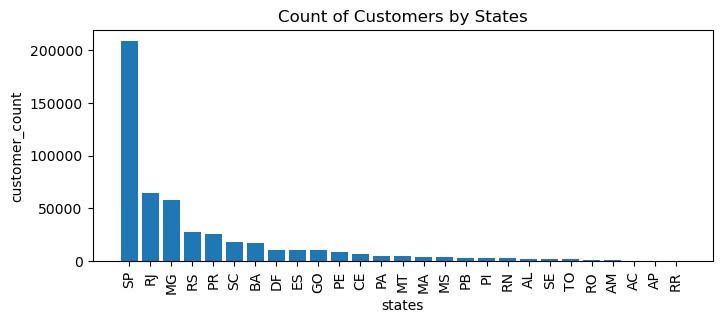

In [39]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
conn = psycopg2.connect(
    dbname="ecommerce", 
    user="postgres", 
    password="Tisha@9639", 
    host="localhost", 
    port="5432"
)
cur = conn.cursor()

query5 = """ select customer_state, count(customer_id) from customers group by customer_state """
cur.execute(query5)
data = cur.fetchall()
#print("The number of customers from each state is ", data)
df = pd.DataFrame(data, columns = ["state", "customer_count"])

print(df)
df = df.sort_values(by = "customer_count", ascending = False)
plt.figure(figsize = (8,3))
plt.bar(df["state"], df["customer_count"])
plt.xticks(rotation = 90)
plt.xlabel("states")
plt.ylabel("customer_count")
plt.title("Count of Customers by States")
plt.show()
cur.close()
conn.close()

# *Intermediate Queries*

#### 1. Calculate the number of orders per month in 2018.

      months  order_count
0      April        34695
1     August        32560
2   February        33640
3    January        36345
4       July        31460
5       June        30835
6      March        36055
7        May        34365
8    October           20
9  September           80
Axes(0.125,0.11;0.775x0.77)


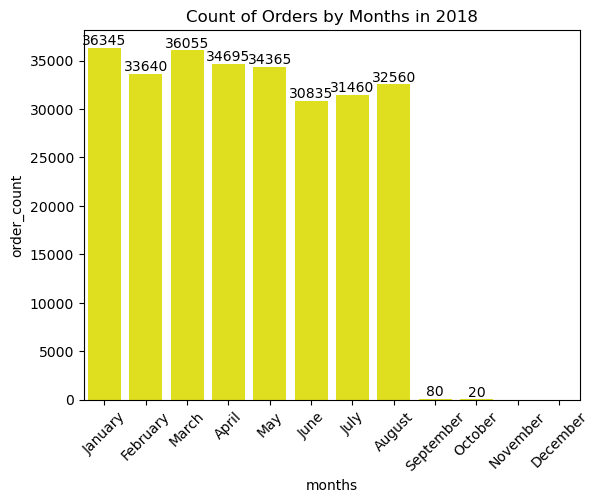

In [42]:
import psycopg2

conn = psycopg2.connect(
    dbname="ecommerce", 
    user="postgres", 
    password="Tisha@9639", 
    host="localhost", 
    port="5432"
)

cur = conn.cursor()
""" (in mysql) select monthname(order_purchase_timestamp) months, count(order_id) 
from orders where year(order_purchase_timestamp) = 2018 group by months """

query1 = """ SELECT TRIM(TO_CHAR(order_purchase_timestamp::timestamp, 'Month')) AS month, 
       COUNT(order_id) AS order_count FROM orders 
WHERE EXTRACT(YEAR FROM order_purchase_timestamp::timestamp) = 2018 
GROUP BY month ORDER BY month"""

cur.execute(query1)
data = cur.fetchall()

df = pd.DataFrame(data, columns = ["months", "order_count"])
print(df)
#order
o = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
visual = sns.barplot(x = df["months"], y = df["order_count"], data = df, order = o, color = "yellow") #hue = df["months"], palette = "viridis"
plt.xticks(rotation = 45)
visual.bar_label(visual.containers[0])
plt.title("Count of Orders by Months in 2018")

print(visual)
cur.close()
conn.close()

#### 2. Find the average number of products per order, grouped by customer city.

In [52]:
import psycopg2

conn = psycopg2.connect(
    dbname="ecommerce", 
    user="postgres", 
    password="Tisha@9639", 
    host="localhost", 
    port="5432"
)

cur = conn.cursor()

query2 = """ with count_per_order as 
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) as average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_orders desc"""

cur.execute(query2)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Customer City" , "Average Products per Order"])
value = df.head(10)
print(value)
cur.close()
conn.close()

        Customer City Average Products per Order
0      padre carvalho                     175.00
1         celso ramos                     162.50
2               datas                     150.00
3       candido godoi                     150.00
4      matias olimpio                     125.00
5     teixeira soares                     100.00
6             picarra                     100.00
7          cidelandia                     100.00
8  morro de sao paulo                     100.00
9          curralinho                     100.00


#### 3. Calculate the percentage of total revenue contributed by each product category.

In [57]:
import psycopg2

conn = psycopg2.connect(
    dbname="ecommerce", 
    user="postgres", 
    password="Tisha@9639", 
    host="localhost", 
    port="5432"
)

cur = conn.cursor()

""" (in mysql) SELECT UPPER(products.productcategory) AS category, 
ROUND((SUM(CAST(payments.payment_value AS numeric)) * 100) / (SELECT SUM(payment_value)::numeric FROM payments), 2) AS sales_percentage
FROM products JOIN order_items ON products.product_id = order_items.product_id
JOIN payments ON payments.order_id = order_items.order_id 
GROUP BY category ORDER BY sales_percentage DESC""" 

query3 = """ WITH order_totals AS (
    SELECT order_items.product_id, SUM(CAST(payments.payment_value AS numeric)) AS total_payment
    FROM order_items JOIN payments ON payments.order_id = order_items.order_id
    GROUP BY order_items.product_id)
SELECT UPPER(products.productcategory) AS category, 
  ROUND((SUM(order_totals.total_payment) * 100) / (SELECT SUM(total_payment) FROM order_totals), 2) AS sales_percentage
  FROM  products 
  JOIN order_totals ON products.product_id = order_totals.product_id
  GROUP BY category ORDER BY sales_percentage DESC """

cur.execute(query3)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Category" , "Percentage distribution"])
value = df.head(5)
print(value)
cur.close()
conn.close()

               Category Percentage distribution
0        BED TABLE BATH                   42.16
1         HEALTH BEAUTY                   40.81
2  COMPUTER ACCESSORIES                   39.03
3  FURNITURE DECORATION                   35.21
4       WATCHES PRESENT                   35.19


#### 4. Identify the correlation between product price and the number of times a product has been purchased.

In [66]:
import psycopg2
import numpy as np
import pandas as pd

conn = psycopg2.connect(
    dbname="ecommerce", 
    user="postgres", 
    password="Tisha@9639", 
    host="localhost", 
    port="5432"
)

cur = conn.cursor()

query4 = """ 
SELECT 
    products.productcategory, 
    COUNT(order_items.product_id) AS order_count, 
    ROUND(AVG(CAST(order_items.price AS numeric)), 2) AS avg_price
FROM 
    products 
JOIN 
    order_items 
ON 
    products.product_id = order_items.product_id 
GROUP BY 
    products.productcategory
"""

cur.execute(query4)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["Category", "Order Count", "Price"])

# Check for NaNs or any weird values
print("DataFrame Info:\n", df.info())
print("\nAny NaNs?\n", df.isnull().sum())
print("\nData:\n", df.head())

# Convert to 1D numpy arrays, ensuring they're numeric and no NaNs
arr1 = pd.to_numeric(df["Order Count"], errors='coerce').fillna(0).to_numpy()
arr2 = pd.to_numeric(df["Price"], errors='coerce').fillna(0).to_numpy()

# Ensuring both arrays are the same length and correct type
print("\narr1 (Order Count):", arr1)
print("\narr2 (Price):", arr2)

# Calculate correlation coefficient
correlation = np.corrcoef(arr1, arr2)[0, 1]

print(df)
print(f"Correlation between Order Count and Price: {correlation:.2f}")

cur.close()
conn.close()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Category     73 non-null     object
 1   Order Count  74 non-null     int64 
 2   Price        74 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.9+ KB
DataFrame Info:
 None

Any NaNs?
 Category       1
Order Count    0
Price          0
dtype: int64

Data:
                     Category  Order Count   Price
0  Agro Industria e Comercio         5300  342.12
1                        Art         5225  115.80
2            Arts and Crafts          600   75.58
3                      audio         9100  139.25
4                 automotive       105875  139.96

arr1 (Order Count): [  5300   5225    600   9100 105875  76625  27300 277875   1600  15100
    350   3825   1800    950   7425 195675   4850  23225   5950   7600
   2575  94900   6950   9475   5950  69175  16975  50775   6550    200
   

#### 5. Calculate the total revenue generated by each seller and rank them by revenue.


                          Seller ID      Revenue  Rank
0  7c67e1448b00f6e969d365cea6b010ab  12679172.75     1
1  1025f0e2d44d7041d6cf58b6550e0bfa   7705551.00     2
2  4a3ca9315b744ce9f8e9374361493884   7531131.75     3
3  1f50f920176fa81dab994f9023523100   7256335.50     4
4  53243585a1d6dc2643021fd1853d8905   7122577.00     5


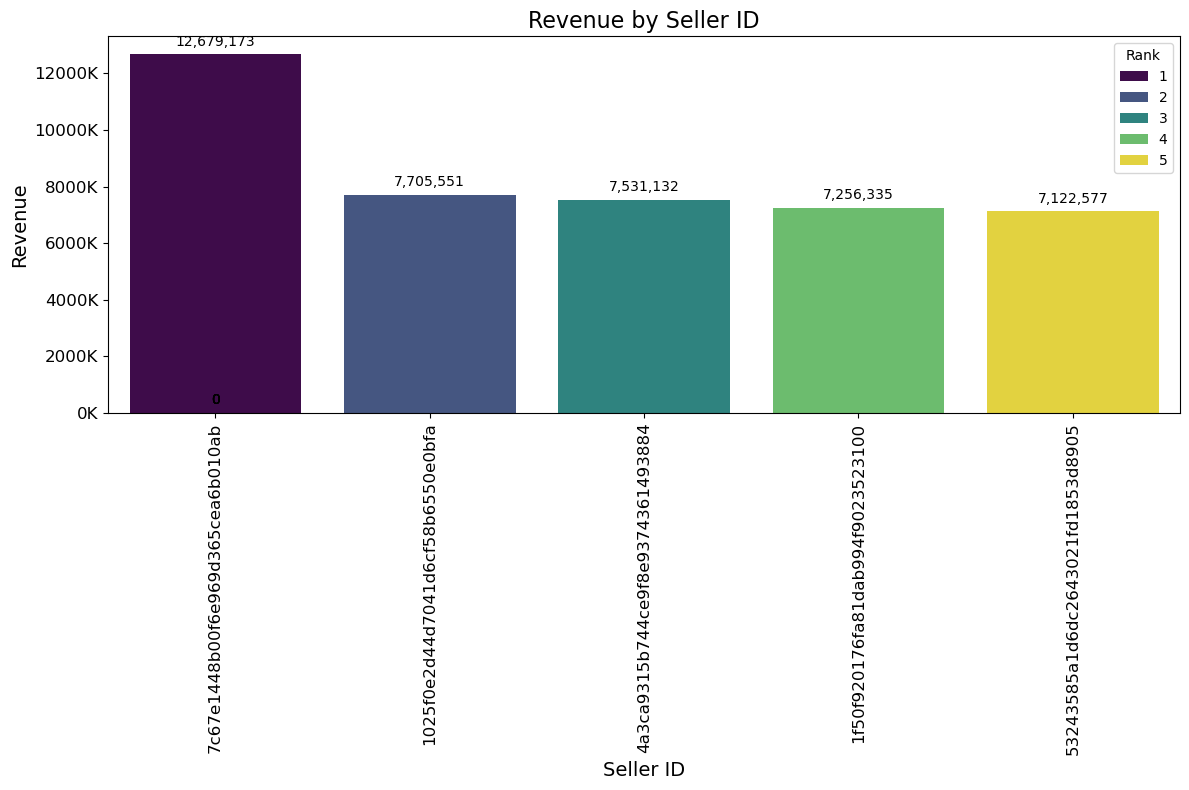

In [74]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

conn = psycopg2.connect(
    dbname="ecommerce", 
    user="postgres", 
    password="Tisha@9639", 
    host="localhost", 
    port="5432"
)

cur = conn.cursor()

query5 = """ 
SELECT *, dense_rank() OVER (ORDER BY revenue DESC) AS rn 
FROM (
    SELECT order_items.seller_id, SUM(payments.payment_value) AS revenue 
    FROM order_items 
    JOIN payments ON order_items.order_id = payments.order_id
    GROUP BY order_items.seller_id
) AS a
"""

cur.execute(query5)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["Seller ID", "Revenue", "Rank"])

# Sorting by Revenue for a cleaner look
df = df.sort_values(by="Revenue", ascending=False)

# Filter to include only the top 5 sellers
top_5_df = df.head(5)
print(top_5_df)

# Plotting
plt.figure(figsize=(12, 8))  # Set the size of the plot
palette = sns.color_palette("viridis", as_cmap=True)  # Choose a color palette
barplot = sns.barplot(x="Seller ID", y="Revenue", data=top_5_df, palette=palette, hue="Rank", dodge=False)

# Adding labels and title
plt.title("Revenue by Seller ID", fontsize=16)
plt.xlabel("Seller ID", fontsize=14)
plt.ylabel("Revenue", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Adding bar labels
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points', fontsize=10, color='black')

# Format y-axis to show values in thousands
formatter = mticker.FuncFormatter(lambda x, _: f'{int(x*1e-3)}K')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()  # Adjust layout to fit everything
plt.show()

cur.close()
conn.close()


# *Advanced Queries*

#### 1. Calculate the moving average of order values for each customer over their order history.

In [13]:
import psycopg2
import pandas as pd

conn = psycopg2.connect(
    dbname="ecommerce", 
    user="postgres", 
    password="Tisha@9639", 
    host="localhost", 
    port="5432"
)

cur = conn.cursor()

query1 = """ select customer_id, 
       order_purchase_timestamp, 
       payment,
       avg(payment) over(
           partition by customer_id 
           order by order_purchase_timestamp 
           rows between 2 preceding and current row
       ) as mov_avg
from (
    select o.customer_id, 
           o.order_purchase_timestamp, 
           p.payment_value as payment
    from payments p
    join orders o
    on p.order_id = o.order_id
) as a
"""

cur.execute(query1)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Customer ID", "Order Purchase Timestamp", "Payment", "Moving Average"])
top_5 = df.head(5)
print(top_5)
cur.close()
conn.close()

                        Customer ID Order Purchase Timestamp  Payment  \
0  00012a2ce6f8dcda20d059ce98491703      2017-11-14 16:08:26   114.74   
1  00012a2ce6f8dcda20d059ce98491703      2017-11-14 16:08:26   114.74   
2  00012a2ce6f8dcda20d059ce98491703      2017-11-14 16:08:26   114.74   
3  00012a2ce6f8dcda20d059ce98491703      2017-11-14 16:08:26   114.74   
4  00012a2ce6f8dcda20d059ce98491703      2017-11-14 16:08:26   114.74   

   Moving Average  
0          114.74  
1          114.74  
2          114.74  
3          114.74  
4          114.74  


#### 2. Calculate the cumulative sales per month for each year.

In [16]:
import psycopg2
import pandas as pd

conn = psycopg2.connect(
    dbname="ecommerce", 
    user="postgres", 
    password="Tisha@9639", 
    host="localhost", 
    port="5432"
)

cur = conn.cursor()

""" (in mysql) select years, months , payment, sum(payment)
over(order by years, months) cumulative_sales from 
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months) as a  """

query2 = """ select years, 
       months, 
       payment, 
       sum(payment) over(order by years, months) as cumulative_sales 
from (
    select extract(year from orders.order_purchase_timestamp::timestamp) as years,
           extract(month from orders.order_purchase_timestamp::timestamp) as months,
           round(sum(payments.payment_value)::numeric, 2) as payment 
    from orders 
    join payments 
    on orders.order_id = payments.order_id
    group by years, months 
    order by years, months
) as a
"""

cur.execute(query2)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Year", "Month", "Sales", "Cumulative Sales"])

print(df)
cur.close()
conn.close()

    Year Month        Sales Cumulative Sales
0   2016     9      6306.00          6306.00
1   2016    10   1477262.00       1483568.00
2   2016    12       490.50       1484058.50
3   2017     1   3462201.00       4946259.50
4   2017     2   7297700.25      12243959.75
5   2017     3  11246590.00      23490549.75
6   2017     4  10444700.75      33935250.50
7   2017     5  14822970.50      48758221.00
8   2017     6  12781909.50      61540130.50
9   2017     7  14809573.00      76349703.50
10  2017     8  16859908.00      93209611.50
11  2017     9  18194061.25     111403672.75
12  2017    10  19491947.00     130895619.75
13  2017    11  29872070.00     160767689.75
14  2017    12  21960037.00     182727726.75
15  2018     1  27875104.50     210602831.25
16  2018     2  24811583.50     235414414.75
17  2018     3  28991303.00     264405717.75
18  2018     4  29019637.00     293425354.75
19  2018     5  28849553.75     322274908.50
20  2018     6  25597012.50     347871921.00
21  2018  

#### 3. Calculate the year-over-year growth rate of total sales.

In [18]:
import psycopg2
import pandas as pd

conn = psycopg2.connect(
    dbname="ecommerce", 
    user="postgres", 
    password="Tisha@9639", 
    host="localhost", 
    port="5432"
)

cur = conn.cursor()

""" (in mysql) with a as(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years, ((payment - lag(payment, 1) over(order by years))/
lag(payment, 1) over(order by years)) * 100 from a 
"""
query3 = """ with a as (
    select extract(year from orders.order_purchase_timestamp::timestamp) as years,
           round(sum(payments.payment_value)::numeric, 2) as payment 
    from orders 
    join payments 
    on orders.order_id = payments.order_id
    group by years 
    order by years
)
select years, 
       ((payment - lag(payment, 1) over(order by years)) / 
       lag(payment, 1) over(order by years)) * 100 as percentage_change
from a
 """

cur.execute(query3)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years", "yoy % growth"])

print(df)
cur.close()
conn.close()

  years             yoy % growth
0  2016                     None
1  2017   12112.7037613409444400
2  2018  20.00092381158258752000


#### 4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [4]:
import psycopg2

conn = psycopg2.connect(
    dbname="ecommerce", 
    user="postgres", 
    password="Tisha@9639", 
    host="localhost", 
    port="5432"
)

cur = conn.cursor()

""" (in mysql) with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id) 

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id """

query4 = """
WITH first_purchases AS (
    SELECT 
        customer_id,
        MIN(order_purchase_timestamp::timestamp) AS first_order
    FROM orders
    GROUP BY customer_id
),

subsequent_purchases AS (
    SELECT 
        fp.customer_id
    FROM first_purchases fp
    JOIN orders o
        ON fp.customer_id = o.customer_id
        AND o.order_purchase_timestamp::timestamp > fp.first_order
        AND o.order_purchase_timestamp::timestamp <= (fp.first_order + INTERVAL '6 months')
    GROUP BY fp.customer_id
),

retention_calculation AS (
    SELECT 
        COUNT(DISTINCT fp.customer_id) AS total_customers,
        COUNT(DISTINCT sp.customer_id) AS retained_customers
    FROM first_purchases fp
    LEFT JOIN subsequent_purchases sp
        ON fp.customer_id = sp.customer_id
)

SELECT 
    ROUND(100.0 * COALESCE(retained_customers, 0) / NULLIF(total_customers, 0), 2) AS retention_rate
FROM retention_calculation
"""

cur.execute(query4)
data = cur.fetchall()

print(data)

cur.close()
conn.close()

[(Decimal('0.00'),)]


#### 5. Identify the top 3 customers who spent the most money in each year.

[(Decimal('2016'), 'a9dc96b027d1252bbac0a9b72d837fc6', Decimal('35588.75'), 1), (Decimal('2016'), '1d34ed25963d5aae4cf3d7f3a4cda173', Decimal('35018.50'), 2), (Decimal('2016'), '4a06381959b6670756de02e07b83815f', Decimal('30694.50'), 3), (Decimal('2017'), '1617b1357756262bfa56ab541c47bc16', Decimal('341602.00'), 1), (Decimal('2017'), 'c6e2731c5b391845f6800c97401a43a9', Decimal('173232.75'), 2), (Decimal('2017'), '3fd6777bbce08a352fddd04e4a7cc8f6', Decimal('168166.50'), 3), (Decimal('2018'), 'ec5b2ba62e574342386871631fafd3fc', Decimal('181872.00'), 1), (Decimal('2018'), 'f48d464a0baaea338cb25f816991ab1f', Decimal('173055.25'), 2), (Decimal('2018'), 'e0a2412720e9ea4f26c1ac985f6a7358', Decimal('120236.00'), 3)]


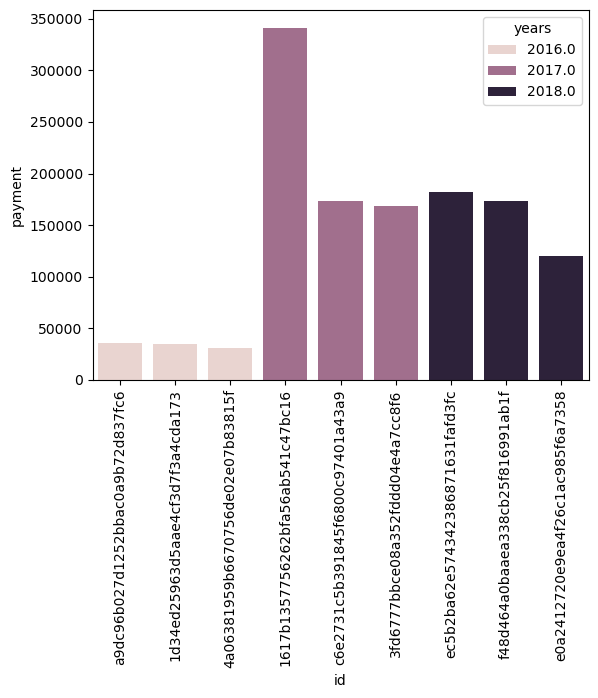

In [9]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = psycopg2.connect(
    dbname="ecommerce", 
    user="postgres", 
    password="Tisha@9639", 
    host="localhost", 
    port="5432"
)

cur = conn.cursor()

""" (in mysql) select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3"""

query5 = """ SELECT 
    years, 
    customer_id, 
    payment, 
    d_rank
FROM (
    SELECT 
        EXTRACT(YEAR FROM orders.order_purchase_timestamp::timestamp) AS years,
        orders.customer_id,
        ROUND(SUM(payments.payment_value)::numeric, 2) AS payment,
        DENSE_RANK() OVER (
            PARTITION BY EXTRACT(YEAR FROM orders.order_purchase_timestamp::timestamp)
            ORDER BY SUM(payments.payment_value) DESC
        ) AS d_rank
    FROM 
        orders 
    JOIN 
        payments 
    ON 
        payments.order_id = orders.order_id
    GROUP BY 
        EXTRACT(YEAR FROM orders.order_purchase_timestamp::timestamp),
        orders.customer_id
) AS a
WHERE 
    d_rank <= 3 """

cur.execute(query5)
data = cur.fetchall()

print(data)

df = pd.DataFrame(data, columns = ["years","id","payment","rank"])
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()

cur.close()
conn.close()
